Lefki Ioanna (Eleanna) Panagiotou 

ID: 908 589 7206

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import  auc, accuracy_score
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
np.random.seed(0)

## Question 3: Language Identification with Naive Bayes 

### 3.1

In [2]:
num_train_samples = 30
num_classes = 3
occurances_of_class_e = 10 
occurances_of_class_j = 10
occurances_of_class_s = 10
a = 0.5

In [3]:
prior_e = (occurances_of_class_e + a) / (num_train_samples + (a * num_classes))
prior_j = (occurances_of_class_j + a) / (num_train_samples + (a * num_classes))
prior_s = (occurances_of_class_s + a) / (num_train_samples + (a * num_classes))

print(f"Prior probability for class e = {prior_e:.4f} \nPrior probability for class j = {prior_j:.4f} \nPrior probability for class s = {prior_s:.4f} \n")

Prior probability for class e = 0.3333 
Prior probability for class j = 0.3333 
Prior probability for class s = 0.3333 



In [4]:
log_priors = [np.log(prior_e), np.log(prior_j), np.log(prior_s)]
print(log_priors)

[-1.0986122886681098, -1.0986122886681098, -1.0986122886681098]


### 3.2

In [5]:
vocab = ["a" ,"b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", " "]

In [6]:
# Count occurances of each character in english files

character_occurances_dict = {character: 0 for character in vocab}

for i in range(0, occurances_of_class_e):
    
    path = "C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/languageID/e" + str(i) + ".txt"
    
    with open(path, 'r', encoding='utf-8') as text:
        for line in text:
            for character in line:
                if character in character_occurances_dict:
                    character_occurances_dict[character] += 1
                    
print(f"Occurancies of each character in English files: {character_occurances_dict}\n")

# Calculate conditional probabilities for every character in English files

total_num_characters = sum(character_occurances_dict.values())
print(total_num_characters)
cond_probs_e = []
log_cond_probs_e = []

print("Conditional probabilities of characters in English:")
for character in character_occurances_dict:
    cond_prob_e = (character_occurances_dict[character] + a) / (total_num_characters + (a * len(vocab)))
    cond_probs_e.append(cond_prob_e)
    log_cond_probs_e.append(np.log(cond_prob_e))
    print(f"\u2022 for character '{character}' = {cond_prob_e:.4f}")

Occurancies of each character in English files: {'a': 910, 'b': 168, 'c': 325, 'd': 332, 'e': 1594, 'f': 286, 'g': 264, 'h': 714, 'i': 838, 'j': 21, 'k': 56, 'l': 438, 'm': 310, 'n': 876, 'o': 975, 'p': 253, 'q': 8, 'r': 814, 's': 1001, 't': 1212, 'u': 403, 'v': 140, 'w': 234, 'x': 17, 'y': 209, 'z': 9, ' ': 2712}

15119
Conditional probabilities of characters in English:
• for character 'a' = 0.0602
• for character 'b' = 0.0111
• for character 'c' = 0.0215
• for character 'd' = 0.0220
• for character 'e' = 0.1054
• for character 'f' = 0.0189
• for character 'g' = 0.0175
• for character 'h' = 0.0472
• for character 'i' = 0.0554
• for character 'j' = 0.0014
• for character 'k' = 0.0037
• for character 'l' = 0.0290
• for character 'm' = 0.0205
• for character 'n' = 0.0579
• for character 'o' = 0.0645
• for character 'p' = 0.0168
• for character 'q' = 0.0006
• for character 'r' = 0.0538
• for character 's' = 0.0662
• for character 't' = 0.0801
• for character 'u' = 0.0267
• for character 

### 3.3

In [7]:
# Count occurances of each character in english files

character_occurances_dict = {character: 0 for character in vocab}

for i in range(0, occurances_of_class_j):
    
    path = "C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/languageID/j" + str(i) + ".txt"
    
    with open(path, 'r', encoding='utf-8') as text:
        for line in text:
            for character in line:
                if character in character_occurances_dict:
                    character_occurances_dict[character] += 1
                    
print(f"Occurancies of each character in Japanese files: {character_occurances_dict}\n")

# Calculate conditional probabilities for every character in english files

total_num_characters = sum(character_occurances_dict.values())
cond_probs_j = []
log_cond_probs_j = []

print("Conditional probabilities of characters in Japanese:")
for character in character_occurances_dict:
    cond_prob_j = (character_occurances_dict[character] + a) / (total_num_characters + (a * len(vocab)))
    cond_probs_j.append(cond_prob_j)
    log_cond_probs_j.append(np.log(cond_prob_j))
    print(f"\u2022 for character '{character}' = {cond_prob_j:.4f}")

Occurancies of each character in Japanese files: {'a': 1885, 'b': 155, 'c': 78, 'd': 246, 'e': 861, 'f': 55, 'g': 200, 'h': 454, 'i': 1388, 'j': 33, 'k': 821, 'l': 20, 'm': 569, 'n': 811, 'o': 1304, 'p': 12, 'q': 1, 'r': 612, 's': 603, 't': 815, 'u': 1010, 'v': 3, 'w': 282, 'x': 0, 'y': 202, 'z': 110, ' ': 1766}

Conditional probabilities of characters in Japanese:
• for character 'a' = 0.1318
• for character 'b' = 0.0109
• for character 'c' = 0.0055
• for character 'd' = 0.0172
• for character 'e' = 0.0602
• for character 'f' = 0.0039
• for character 'g' = 0.0140
• for character 'h' = 0.0318
• for character 'i' = 0.0970
• for character 'j' = 0.0023
• for character 'k' = 0.0574
• for character 'l' = 0.0014
• for character 'm' = 0.0398
• for character 'n' = 0.0567
• for character 'o' = 0.0912
• for character 'p' = 0.0009
• for character 'q' = 0.0001
• for character 'r' = 0.0428
• for character 's' = 0.0422
• for character 't' = 0.0570
• for character 'u' = 0.0706
• for character 'v' = 0

In [8]:
# Count occurances of each character in Spanish files

character_occurances_dict = {character: 0 for character in vocab}

for i in range(0, occurances_of_class_s):
    
    path = "C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/languageID/s" + str(i) + ".txt"
    
    with open(path, 'r', encoding='utf-8') as text:
        for line in text:
            for character in line:
                if character in character_occurances_dict:
                    character_occurances_dict[character] += 1
                    
print(f"Occurancies of each character in Spanish files: {character_occurances_dict}\n")

# Calculate conditional probabilities for every character in Spanish files

total_num_characters = sum(character_occurances_dict.values())
cond_probs_s = []
log_cond_probs_s = []

print("Conditional probabilities of characters in Spanish:")
for character in character_occurances_dict:
    cond_prob_s = (character_occurances_dict[character] + a) / (total_num_characters + (a * len(vocab)))
    cond_probs_s.append(cond_prob_s)
    log_cond_probs_s.append(np.log(cond_prob_s))
    print(f"\u2022 for character '{character}' = {cond_prob_s:.4f}")

Occurancies of each character in Spanish files: {'a': 1695, 'b': 133, 'c': 608, 'd': 644, 'e': 1845, 'f': 139, 'g': 116, 'h': 73, 'i': 808, 'j': 107, 'k': 4, 'l': 858, 'm': 418, 'n': 878, 'o': 1175, 'p': 393, 'q': 124, 'r': 961, 's': 1066, 't': 577, 'u': 546, 'v': 95, 'w': 1, 'x': 40, 'y': 127, 'z': 43, ' ': 2728}

Conditional probabilities of characters in Spanish:
• for character 'a' = 0.1046
• for character 'b' = 0.0082
• for character 'c' = 0.0375
• for character 'd' = 0.0397
• for character 'e' = 0.1138
• for character 'f' = 0.0086
• for character 'g' = 0.0072
• for character 'h' = 0.0045
• for character 'i' = 0.0499
• for character 'j' = 0.0066
• for character 'k' = 0.0003
• for character 'l' = 0.0529
• for character 'm' = 0.0258
• for character 'n' = 0.0542
• for character 'o' = 0.0725
• for character 'p' = 0.0243
• for character 'q' = 0.0077
• for character 'r' = 0.0593
• for character 's' = 0.0658
• for character 't' = 0.0356
• for character 'u' = 0.0337
• for character 'v' = 

### 3.4

In [99]:
character_occurances_dict = {character: 0 for character in vocab}
    
path = "C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/languageID/e10.txt"

with open(path, 'r', encoding='utf-8') as text:
    for line in text:
        for character in line:
            if character in character_occurances_dict:
                character_occurances_dict[character] += 1
                
print(f"Bag-of-words for file e10.txt:\n{character_occurances_dict}")

Bag-of-words for file e10.txt:
{'a': 164, 'b': 32, 'c': 53, 'd': 57, 'e': 311, 'f': 55, 'g': 51, 'h': 140, 'i': 140, 'j': 3, 'k': 6, 'l': 85, 'm': 64, 'n': 139, 'o': 182, 'p': 53, 'q': 3, 'r': 141, 's': 186, 't': 225, 'u': 65, 'v': 31, 'w': 47, 'x': 4, 'y': 38, 'z': 2, ' ': 498}


### 3.5

#### $\hat p(x \mid y=e)$

In [100]:
product = 1

for i, occurances in enumerate(character_occurances_dict.values()):
    product *= (cond_probs_e[i])**occurances
print(product)

0.0


#### $\hat p(x \mid y=j)$

In [103]:
product = 1

for i, occurances in enumerate(character_occurances_dict.values()):
    product *= (cond_probs_j[i])**occurances
print(product)

0.0


#### $\hat p(x \mid y=s)$

In [107]:
product = 1

for i, occurances in enumerate(character_occurances_dict.values()):
    product *= (cond_probs_j[i])**occurances
print(product)

0.0


#### $log(\hat p(x \mid y=e))$

In [102]:
summation = 0

for i, occurances in enumerate(character_occurances_dict.values()):
    summation += occurances * (log_cond_probs_e[i])
print((summation))

-7841.865447060635


#### $log(\hat p(x \mid y=j))$

In [104]:
summation = 0

for i, occurances in enumerate(character_occurances_dict.values()):
    summation += occurances * (log_cond_probs_j[i])
print((summation))

-8771.433079075032


#### $log(\hat p(x \mid y=s))$

In [105]:
summation = 0

for i, occurances in enumerate(character_occurances_dict.values()):
    summation += occurances * (log_cond_probs_s[i])
print((summation))

-8467.282044010557


### 3.7

In [21]:
def nb_predict(path, log_cond_probs_e, log_cond_probs_j, log_cond_probs_s):
    
    character_occurances_dict = {character: 0 for character in vocab}

    with open(path, 'r', encoding='utf-8') as text:
        for line in text:
            for character in line:
                if character in character_occurances_dict:
                    character_occurances_dict[character] += 1
    
    summations = [0, 0, 0]
    for i, occurances in enumerate(character_occurances_dict.values()):
        summations[0] += occurances * (log_cond_probs_e[i])
    
    for i, occurances in enumerate(character_occurances_dict.values()):
        summations[1] += occurances * (log_cond_probs_j[i])
    
    for i, occurances in enumerate(character_occurances_dict.values()):
        summations[2] += occurances * (log_cond_probs_s[i])
    
    index_of_max = max(range(len(summations)), key=lambda i: summations[i])
    
    if index_of_max == 0:
        return 'e'
    elif index_of_max == 1:
        return 'j'
    
    return 's'

In [30]:
classes = ['e', 'j', 's']
conf_mat = np.zeros((3,3))

for row,label in enumerate(classes):
    for i in range(10, 20):
        path = "C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/languageID/" + label + str(i) + ".txt"
        y_pred = nb_predict(path, log_cond_probs_e, log_cond_probs_j, log_cond_probs_s)
        
        if y_pred == label:
            conf_mat[row][row] += 1
        elif y_pred == 'e':
            conf_mat[row][0] += 1
        elif y_pred == 'j':
            conf_mat[row][1] += 1
        elif y_pred == 's':
            conf_mat[row][2] += 1
            
print(f"Confusion matrix:\n {conf_mat}")

Confusion matrix:
 [[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]


## Question 4: Simple Feed-Forward Network

### 4.2

In [5]:
import gzip
import numpy as np

# Define functions to read the binary files
def read_images(filename):
    with gzip.open(filename, 'rb') as file:
        data = np.frombuffer(file.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def read_labels(filename):
    with gzip.open(filename, 'rb') as file:
        data = np.frombuffer(file.read(), np.uint8, offset=8)
    return data

train_images_file = 'C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/MNIST/train-images-idx3-ubyte.gz'
train_labels_file = 'C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/MNIST/train-labels-idx1-ubyte.gz'
test_images_file = 'C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/MNIST/t10k-images-idx3-ubyte.gz'
test_labels_file = 'C:/Users/lefki/Documents/MyDesktop/Master/Semester 1/ECE 760/HW4/MNIST/t10k-labels-idx1-ubyte.gz'

train_images = read_images(train_images_file)
train_labels = read_labels(train_labels_file)
test_images = read_images(test_images_file)
test_labels = read_labels(test_labels_file)


In [6]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

def softmax(z):
    
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    
    return e_z / (e_z.sum(axis=0, keepdims=True) + 1e-10)

def cross_entropy(y_pred, y_true):
    
    loss = np.mean(np.sum(-1 * y_true * np.log(y_pred + 1e-10), axis=0))
        
    return loss

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [1/50], , Train Loss: 2.2439, Test Loss: 1.0386, Test Accuracy: 0.79%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [2/50], , Train Loss: 0.9146, Test Loss: 0.7641, Test Accuracy: 0.84%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [3/50], , Train Loss: 0.7076, Test Loss: 0.6468, Test Accuracy: 0.86%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [4/50], , Train Loss: 0.5967, Test Loss: 0.5752, Test Accuracy: 0.87%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [5/50], , Train Loss: 0.5237, Test Loss: 0.5250, Test Accuracy: 0.88%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [6/50], , Train Loss: 0.4704, Test Loss: 0.4869, Test Accuracy: 0.89%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [7/50], , Train Loss: 0.4290, Test Loss: 0.4567, Test Accuracy: 0.90%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [8/50], , Train Loss: 0.3955, Test Loss: 0.4319, Test Accuracy: 0.90%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [9/50], , Train Loss: 0.3678, Test Loss: 0.4111, Test Accuracy: 0.90%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [10/50], , Train Loss: 0.3442, Test Loss: 0.3936, Test Accuracy: 0.91%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [11/50], , Train Loss: 0.3239, Test Loss: 0.3785, Test Accuracy: 0.91%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [12/50], , Train Loss: 0.3061, Test Loss: 0.3654, Test Accuracy: 0.91%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [13/50], , Train Loss: 0.2905, Test Loss: 0.3539, Test Accuracy: 0.91%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [14/50], , Train Loss: 0.2765, Test Loss: 0.3437, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [15/50], , Train Loss: 0.2639, Test Loss: 0.3345, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [16/50], , Train Loss: 0.2525, Test Loss: 0.3263, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [17/50], , Train Loss: 0.2421, Test Loss: 0.3188, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [18/50], , Train Loss: 0.2326, Test Loss: 0.3120, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [19/50], , Train Loss: 0.2239, Test Loss: 0.3058, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [20/50], , Train Loss: 0.2158, Test Loss: 0.3000, Test Accuracy: 0.92%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [21/50], , Train Loss: 0.2083, Test Loss: 0.2947, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [22/50], , Train Loss: 0.2014, Test Loss: 0.2899, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [23/50], , Train Loss: 0.1949, Test Loss: 0.2854, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [24/50], , Train Loss: 0.1889, Test Loss: 0.2812, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [25/50], , Train Loss: 0.1832, Test Loss: 0.2773, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [26/50], , Train Loss: 0.1778, Test Loss: 0.2737, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [27/50], , Train Loss: 0.1728, Test Loss: 0.2703, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [28/50], , Train Loss: 0.1680, Test Loss: 0.2671, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [29/50], , Train Loss: 0.1635, Test Loss: 0.2641, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [30/50], , Train Loss: 0.1593, Test Loss: 0.2613, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [31/50], , Train Loss: 0.1552, Test Loss: 0.2587, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [32/50], , Train Loss: 0.1514, Test Loss: 0.2563, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [33/50], , Train Loss: 0.1477, Test Loss: 0.2539, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [34/50], , Train Loss: 0.1442, Test Loss: 0.2517, Test Accuracy: 0.93%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [35/50], , Train Loss: 0.1409, Test Loss: 0.2497, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [36/50], , Train Loss: 0.1377, Test Loss: 0.2477, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [37/50], , Train Loss: 0.1346, Test Loss: 0.2458, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [38/50], , Train Loss: 0.1317, Test Loss: 0.2440, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [39/50], , Train Loss: 0.1289, Test Loss: 0.2424, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [40/50], , Train Loss: 0.1261, Test Loss: 0.2408, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [41/50], , Train Loss: 0.1235, Test Loss: 0.2392, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [42/50], , Train Loss: 0.1210, Test Loss: 0.2378, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [43/50], , Train Loss: 0.1186, Test Loss: 0.2364, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [44/50], , Train Loss: 0.1163, Test Loss: 0.2351, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [45/50], , Train Loss: 0.1140, Test Loss: 0.2338, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [46/50], , Train Loss: 0.1118, Test Loss: 0.2326, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [47/50], , Train Loss: 0.1097, Test Loss: 0.2314, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [48/50], , Train Loss: 0.1077, Test Loss: 0.2303, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [49/50], , Train Loss: 0.1057, Test Loss: 0.2293, Test Accuracy: 0.94%


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [50/50], , Train Loss: 0.1038, Test Loss: 0.2282, Test Accuracy: 0.94%


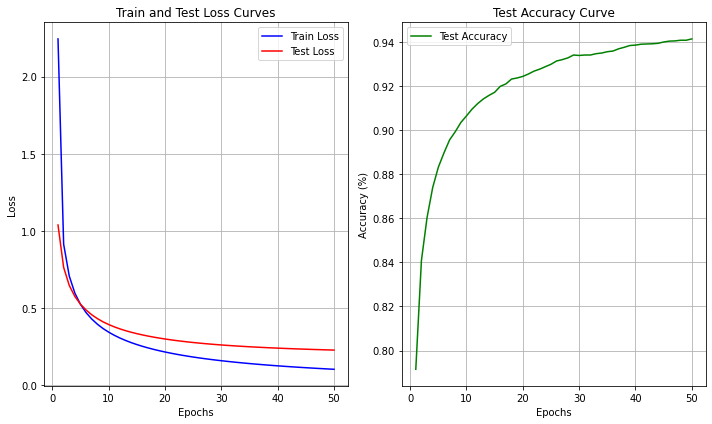

In [35]:
d = X_train.shape[1] * X_train.shape[2]  # 28x28 pixel images
d_1 = 300
k = 10  

np.random.seed(0)
W_1 = np.random.normal(0, 1, (d_1, d))
W_2 = np.random.normal(0, 1, (k, d_1))

lr = 1e-3
epochs = 50
batch_size = 32

X_train = train_images / 255.0
X_test = test_images / 255.0
X_test = X_test.reshape(-1, d)  # Flatten each image
X_test = np.transpose(X_test)
    
y_train = np.eye(k)[train_labels]
y_test = np.eye(k)[test_labels]
y_test = np.transpose(y_test)

train_losses = []
test_losses = []
test_accuracies = []

for epoch in tqdm(range(epochs)):
    
    batch_bar = tqdm(range(0, X_train.shape[0], batch_size))
    loss_per_epoch = []
    
    for i in batch_bar:
        
        X_batch = X_train[i:i + batch_size].reshape(-1, d)  # Flatten each image
        X_batch = np.transpose(X_batch)
        y_batch = y_train[i:i + batch_size]
        y_batch = np.transpose(y_batch)
        
        # Forward pass
        z_1 = np.dot( W_1, X_batch)
        h_1 = sigmoid(z_1)
        z_2 = np.dot(W_2, h_1) 
        y_hat = softmax(z_2)

        # Compute loss 
        loss = cross_entropy(y_hat, y_batch)
        loss_per_epoch.append(loss)
        
        # Backward pass
        temp = y_hat - y_batch
        dl_W2 = np.dot(temp, h_1.T)
        
        temp2 = h_1 * (1 - h_1)
        temp3 = np.dot(np.transpose(W_2), temp) * temp2
        dl_W1 = np.dot(temp3, np.transpose(X_batch))
        
        #Update
        W_1 = W_1 - lr * dl_W1
        W_2 = W_2 - lr * dl_W2
        
        
        batch_bar.set_description('Loss: %.2f' %(loss))
    
    # Test
    z_1 = np.dot( W_1, X_test)
    h_1 = sigmoid(z_1)
    z_2 = np.dot(W_2, h_1) 
    y_hat = softmax(z_2)
    
    # Compute test loss and accuracy 
    test_loss = cross_entropy(y_hat, y_test)
    predicted_labels = np.argmax(y_hat, axis=0)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=0), predicted_labels)
    test_accuracies.append(test_accuracy)
    
    train_losses.append(sum(loss_per_epoch) / len(loss_per_epoch))
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], , Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 4.3

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch [1/30], Train Loss: 1.2497, Test Loss: 0.6230, Test Accuracy: 85.58%
Epoch [2/30], Train Loss: 0.5191, Test Loss: 0.4244, Test Accuracy: 88.96%
Epoch [3/30], Train Loss: 0.4079, Test Loss: 0.3627, Test Accuracy: 90.10%
Epoch [4/30], Train Loss: 0.3640, Test Loss: 0.3326, Test Accuracy: 90.47%
Epoch [5/30], Train Loss: 0.3393, Test Loss: 0.3151, Test Accuracy: 91.07%
Epoch [6/30], Train Loss: 0.3223, Test Loss: 0.3018, Test Accuracy: 91.39%
Epoch [7/30], Train Loss: 0.3094, Test Loss: 0.2903, Test Accuracy: 91.62%
Epoch [8/30], Train Loss: 0.2991, Test Loss: 0.2839, Test Accuracy: 91.96%
Epoch [9/30], Train Loss: 0.2898, Test Loss: 0.2766, Test Accuracy: 92.07%
Epoch [10/30], Train Loss: 0.2817, Test Loss: 0.2691, Test Accuracy: 92.17%
Epoch [11/30], Train Loss: 0.2741, Test Loss: 0.2630, Test Accuracy: 92.55%
Epoch [12/30], Train Loss: 0.2670, Test Loss: 0.2561, Test Accuracy: 92.56%
Epoch [13/30], Train Loss: 0.2601, Test Loss: 0.2515, Test Accuracy: 92.80%
Epoch [14/30], Train 

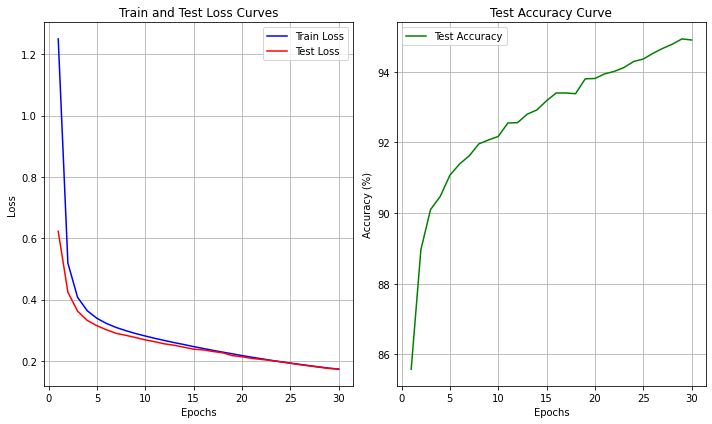

In [31]:
# Define a simple feedforward neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Data loaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
input_size = 28 * 28  # MNIST image size
hidden_size = 300
output_size = 10
model = FeedforwardNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 30
learning_curve = []
test_learning_curve = []
test_accuracy_curve = []

for epoch in tqdm(range(num_epochs)):
    train_total_loss = 0.0
    test_total_loss = 0.0
    for images, labels in train_loader:
        # Flatten the input data
        images = images.view(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_total_loss += loss.item()
    
    avg_loss = train_total_loss / len(train_loader)
    learning_curve.append(avg_loss)
#     print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_loss:.4f}')

# Testing
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_total_loss / len(test_loader)
    test_learning_curve.append(avg_test_loss)
    test_accuracy = 100 * correct / total
    test_accuracy_curve.append(test_accuracy)  # Store test accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), learning_curve, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_learning_curve, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracy_curve, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 4.4

#### Initialize weights to zero

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch [1/30], Train Loss: 2.3019, Test Loss: 2.3017, Test Accuracy: 11.35%
Epoch [2/30], Train Loss: 2.3018, Test Loss: 2.3015, Test Accuracy: 11.35%
Epoch [3/30], Train Loss: 2.3018, Test Loss: 2.3012, Test Accuracy: 11.35%
Epoch [4/30], Train Loss: 2.3020, Test Loss: 2.3014, Test Accuracy: 11.35%
Epoch [5/30], Train Loss: 2.3017, Test Loss: 2.3023, Test Accuracy: 11.35%
Epoch [6/30], Train Loss: 2.3019, Test Loss: 2.3021, Test Accuracy: 11.35%
Epoch [7/30], Train Loss: 2.3020, Test Loss: 2.3017, Test Accuracy: 11.35%
Epoch [8/30], Train Loss: 2.3019, Test Loss: 2.3021, Test Accuracy: 11.35%
Epoch [9/30], Train Loss: 2.3018, Test Loss: 2.3022, Test Accuracy: 11.35%
Epoch [10/30], Train Loss: 2.3019, Test Loss: 2.3011, Test Accuracy: 11.35%
Epoch [11/30], Train Loss: 2.3019, Test Loss: 2.3012, Test Accuracy: 11.35%
Epoch [12/30], Train Loss: 2.3018, Test Loss: 2.3014, Test Accuracy: 11.35%
Epoch [13/30], Train Loss: 2.3018, Test Loss: 2.3017, Test Accuracy: 11.35%
Epoch [14/30], Train 

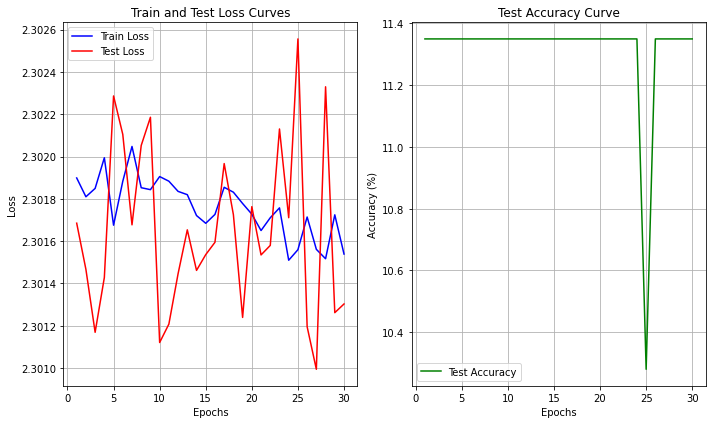

In [32]:
# Define a simple feedforward neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        self.fc1.weight.data.fill_(0.0)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size, bias=False)
        self.fc2.weight.data.fill_(0.0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Data loaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
input_size = 28 * 28  # MNIST image size
hidden_size = 300
output_size = 10
model = FeedforwardNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training and test loss curves
num_epochs = 30
train_learning_curve = []
test_learning_curve = []
test_accuracy_curve = []

for epoch in tqdm(range(num_epochs)):
    train_total_loss = 0.0
    test_total_loss = 0.0

    # Training
    model.train()
    for images, labels in train_loader:
        # Flatten the input data
        images = images.view(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_total_loss += loss.item()

    avg_train_loss = train_total_loss / len(train_loader)
    train_learning_curve.append(avg_train_loss)
#     print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}')

    # Testing
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_total_loss / len(test_loader)
    test_learning_curve.append(avg_test_loss)
    test_accuracy = 100 * correct / total
    test_accuracy_curve.append(test_accuracy)  # Store test accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_learning_curve, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_learning_curve, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracy_curve, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### Initialize weights randomly between [-1,1]

Epoch [1/30], Train Loss: 1.8002, Test Loss: 0.8383, Test Accuracy: 43.19%
Epoch [2/30], Train Loss: 0.7302, Test Loss: 0.6023, Test Accuracy: 56.16%
Epoch [3/30], Train Loss: 0.5783, Test Loss: 0.5112, Test Accuracy: 63.35%
Epoch [4/30], Train Loss: 0.5027, Test Loss: 0.4605, Test Accuracy: 68.00%
Epoch [5/30], Train Loss: 0.4547, Test Loss: 0.4274, Test Accuracy: 71.25%
Epoch [6/30], Train Loss: 0.4196, Test Loss: 0.4016, Test Accuracy: 73.69%
Epoch [7/30], Train Loss: 0.3928, Test Loss: 0.3804, Test Accuracy: 75.60%
Epoch [8/30], Train Loss: 0.3710, Test Loss: 0.3645, Test Accuracy: 77.13%
Epoch [9/30], Train Loss: 0.3529, Test Loss: 0.3530, Test Accuracy: 78.40%
Epoch [10/30], Train Loss: 0.3373, Test Loss: 0.3401, Test Accuracy: 79.47%
Epoch [11/30], Train Loss: 0.3241, Test Loss: 0.3293, Test Accuracy: 80.38%
Epoch [12/30], Train Loss: 0.3122, Test Loss: 0.3225, Test Accuracy: 81.16%
Epoch [13/30], Train Loss: 0.3016, Test Loss: 0.3126, Test Accuracy: 81.86%
Epoch [14/30], Train 

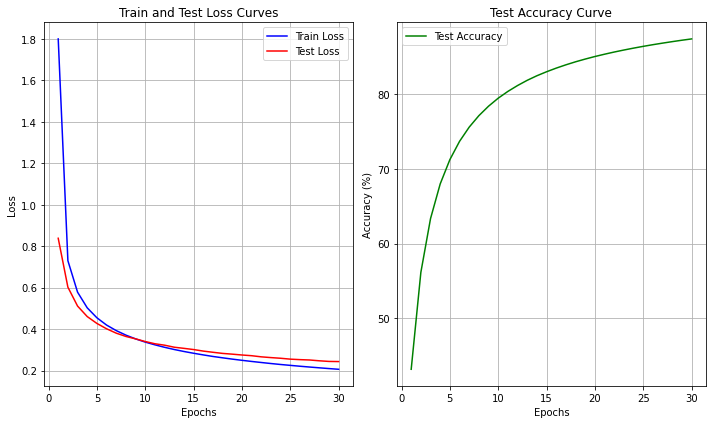

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        nn.init.uniform_(self.fc1.weight, -1, 1)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size, bias=False)
        nn.init.uniform_(self.fc2.weight, -1, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Data loaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
input_size = 28 * 28  # MNIST image size
hidden_size = 300
output_size = 10
model = FeedforwardNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training and test loss curves
num_epochs = 30
train_learning_curve = []
test_learning_curve = []
test_accuracy_curve = []

for epoch in range(num_epochs):
    train_total_loss = 0.0
    test_total_loss = 0.0

    # Training
    model.train()
    for images, labels in train_loader:
        # Flatten the input data
        images = images.view(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_total_loss += loss.item()

    avg_train_loss = train_total_loss / len(train_loader)
    train_learning_curve.append(avg_train_loss)

# Testing
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_total_loss / len(test_loader)
    test_learning_curve.append(avg_test_loss)
    test_accuracy = 100 * correct / total
    test_accuracy_curve.append(test_accuracy)  # Store test accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_learning_curve, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_learning_curve, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracy_curve, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()